In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import box

## Load data

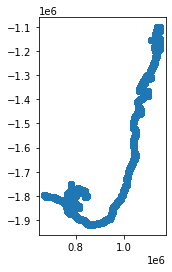

In [2]:
# Path to geopackage data
gpkg_path = '/g/data/r78/DEACoastlines/releases/DEACoastlines_v1.0.0/GeoPackage/DEACoastlines_v1.0.0.gpkg'

# Input coords
miny, minx =  -10.33811, 138.34069
maxy, maxx = -18.22204, 142.213721

# Create bounding box and use this to load data using geopandas
bbox = gpd.GeoSeries(box(minx, miny, maxx, maxy), crs='EPSG:4326')
points_gdf = gpd.read_file(gpkg_path, 
                           layer='DEACoastlines_ratesofchange_v1.0.0', 
                           bbox=bbox)

# Plot
points_gdf.plot()

## Extract coords from geometry object

In [3]:
# Coordinates will be in Australian Albers (`EPSG:3577`) with metre units
# To convert to degrees lat/lon:
# points_gdf = points_gdf.to_crs('EPSG:4326')

# Add x and y coords as new field
points_gdf['x_coord'] = points_gdf.geometry.x
points_gdf['y_coord'] = points_gdf.geometry.y

# Create new index based on y coords, and sort
points_gdf = points_gdf.set_index('y_coord').sort_index(ascending=False)

# Reset index to get incremental ids
points_gdf = points_gdf.reset_index()
points_gdf

,y_coord,rate_time,sig_time,se_time,outl_time,rate_soi,sig_soi,se_soi,outl_soi,dist_1988,...,dist_2019,retreat,growth,sce,nsm,max_year,min_year,breaks,geometry,x_coord
0,-1.102313e+06,-0.18,0.122,0.11,None,0.16,0.833,0.75,1988 1989 2018,18.90,...,0.0,1,0,26.08,-18.90,2018,2010,None,POINT (1137919.513 -1102313.200),1.137920e+06
1,-1.102319e+06,-0.08,0.259,0.07,None,1.44,0.060,0.74,1996,9.36,...,0.0,1,0,16.53,-9.36,2011,1996,None,POINT (1137664.447 -1102319.200),1.137664e+06
2,-1.102323e+06,-0.38,0.000,0.08,None,0.09,0.948,1.36,None,15.95,...,0.0,1,0,18.69,-15.95,1988,2008,None,POINT (1138111.395 -1102322.787),1.138111e+06
3,-1.102333e+06,-0.18,0.356,0.19,None,0.07,0.940,0.98,1988 1989 2018,31.06,...,0.0,1,0,46.41,-31.06,2018,2009,None,POINT (1137942.376 -1102332.865),1.137942e+06
4,-1.102339e+06,0.05,0.308,0.05,None,-0.56,0.397,0.65,None,-0.31,...,0.0,0,1,11.28,0.31,1991,1994,None,POINT (1146329.006 -1102339.381),1.146329e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90041,-1.919550e+06,0.72,0.000,0.09,None,-0.95,0.634,1.98,None,-30.49,...,0.0,0,1,31.42,30.49,2019,1989,None,POINT (871739.550 -1919550.482),8.717395e+05
90042,-1.919552e+06,0.43,0.000,0.09,None,-1.95,0.188,1.45,None,-25.21,...,0.0,0,1,27.90,25.21,2019,1989,None,POINT (871891.168 -1919551.820),8.718912e+05
90043,-1.919576e+06,0.80,0.000,0.08,None,-1.03,0.630,2.11,None,-36.87,...,0.0,0,1,36.87,36.87,2019,1988,None,POINT (871755.796 -1919575.617),8.717558e+05
90044,-1.919577e+06,0.56,0.000,0.13,None,-2.81,0.176,2.03,None,-30.37,...,0.0,0,1,31.74,30.37,2019,1989,None,POINT (871907.150 -1919577.212),8.719071e+05
